In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

/Users/huzuoliang/app/Anaconda/anaconda/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
Data_File = '/Users/huzuoliang/mining/tensflow/slr05.xls'

In [5]:
book = xlrd.open_workbook(Data_File, encoding_override='utf-8')

In [7]:
sheet = book.sheet_by_index(0)

In [8]:
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])

In [10]:
n_samples = sheet.nrows - 1

In [11]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

In [12]:
w = tf.Variable(0.0, name = 'weights')
b = tf.Variable(0.0, name = 'bias')

In [13]:
Y_predicted = X * w + b

In [14]:
loss = tf.square(Y - Y_predicted, name = 'loss')

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [97]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10):
        loss_value = 0
        for x,y in data:
            sess.run(optimizer, feed_dict={X:x,Y:y})
        w_value,b_value = sess.run([w, b])
        for x,y in data: 
            loss_value = loss_value + 1.62071*x+16.9162 #sess.run(Y_predicted, feed_dict={X:x})

        print('w:' + str(w_value) + ' b:' + str(b_value)+' loss:'+ str(loss_value))

w:3.03184 b:0.633049 loss:1574.480901
w:2.99433 b:1.06587 loss:1574.480901
w:2.95782 b:1.48719 loss:1574.480901
w:2.92227 b:1.89731 loss:1574.480901
w:2.88768 b:2.29653 loss:1574.480901
w:2.854 b:2.68515 loss:1574.480901
w:2.82122 b:3.06344 loss:1574.480901
w:2.7893 b:3.43168 loss:1574.480901
w:2.75824 b:3.79013 loss:1574.480901
w:2.728 b:4.13906 loss:1574.480901


In [37]:
py1 = w_value * 0 + b_value
pyn = w_value * 40 + b_value

1.62028


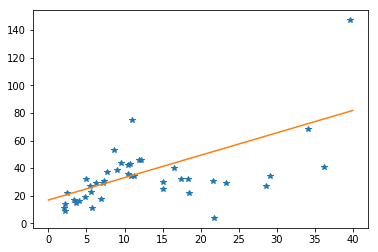

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data[:,0],data[:,1],'*')
ax1.plot(np.array([0,40]),np.array([py1,pyn]), '-')
plt.show()

In [7]:
x_input = np.linspace(-1,1,100)
y_input = x_input * 3 + np.random.rand(x_input.shape[0])*0.5

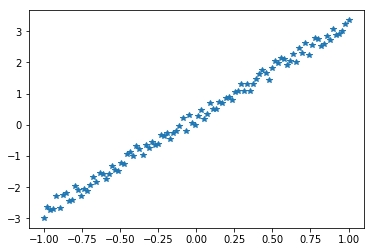

In [10]:
fig = plt.figure()
f = fig.add_subplot(111)
f.plot(x_input,y_input,'*')
plt.show()

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        loss_value = 0
        sess.run(optimizer, feed_dict={X:x_input,Y:y_input})
    w_value,b_value = sess.run([w, b])
print('w:' + str(w_value) + ' b:' + str(b_value))

w:3.02201 b:0.241595


In [21]:
global_step = tf.Variable(0,trainable=False,dtype=tf.int32)

In [22]:
learning_rate=0.01 * 0.99 ** tf.cast(global_step,tf.float32)

In [23]:
increment_step = global_step.assign_add(1)

<tf.Tensor 'mul_1:0' shape=() dtype=float32>

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate) # learning rate can be a tensor

In [26]:
optimizer = GradientDescentOptimizer(learning_rate=0.1)

NameError: name 'GradientDescentOptimizer' is not defined

In [2]:
from tensorflow.examples.tutorials.mnist import input_data 
MNIST = input_data.read_data_sets("/Users/huzuoliang/Desktop/train_set/mnist", one_hot=True)

Extracting /Users/huzuoliang/Desktop/train_set/mnist/train-images-idx3-ubyte.gz
Extracting /Users/huzuoliang/Desktop/train_set/mnist/train-labels-idx1-ubyte.gz
Extracting /Users/huzuoliang/Desktop/train_set/mnist/t10k-images-idx3-ubyte.gz
Extracting /Users/huzuoliang/Desktop/train_set/mnist/t10k-labels-idx1-ubyte.gz


In [60]:
learning_rate = 0.01
batch_size = 16
n_epochs = 1

In [61]:
X = tf.placeholder(tf.float32,[batch_size,784])
Y = tf.placeholder(tf.float32,[batch_size,10])

In [62]:
X1 = tf.placeholder(tf.float32,[None,784])

In [63]:
w = tf.Variable(tf.random_normal(shape=[784,10],stddev=0.01),name='weigths')

In [64]:
b = tf.Variable(tf.zeros([1,10]),name='bias')

In [65]:
logits = tf.matmul(X,w)+b

In [66]:
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y)

In [67]:
loss = tf.reduce_mean(entropy)

In [68]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [69]:
init = tf.global_variables_initializer()

In [71]:
lss = []
with tf.Session() as sess:
    sess.run(init)
    n_batches = int(MNIST.train.num_examples/batch_size)
    for i in range(n_epochs):
        for _ in range(n_batches):
            X_batch,Y_batch = MNIST.train.next_batch(batch_size)
            _,loss_batch = sess.run([optimizer,loss],feed_dict={X:X_batch,Y:Y_batch})
            lss.append(loss_batch)
    w_value, b_value = sess.run([w, b])
    n_batches = int(MNIST.test.num_examples/batch_size)
    total_corrent_preds = 0
    for i in range(n_batches):
        x_batch,y_batch = MNIST.test.next_batch(batch_size)
        _,loss_batch,logits_batch = sess.run([optimizer,loss,logits],feed_dict={X:x_batch,Y:y_batch})
        preds = tf.nn.softmax(logits_batch)
        correct_preds=tf.equal(tf.argmax(preds,1),tf.argmax(y_batch,1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds,tf.float32))
        total_corrent_preds += sess.run(accuracy)
    print(total_corrent_preds/MNIST.test.num_examples)

0.8391


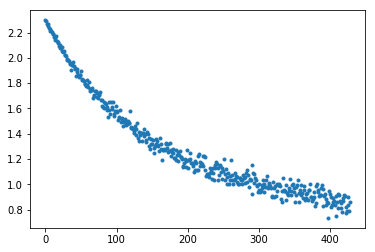

In [77]:
idx = np.array(list(range(0,len(lss))))
fig = plt.figure()
f = fig.subplots()
f.plot(idx,lss,'.')
plt.show()

In [73]:
lss

[2.2968121,
 2.2892611,
 2.263999,
 2.2702179,
 2.253243,
 2.2387748,
 2.2245536,
 2.2121217,
 2.2153845,
 2.2015834,
 2.1896431,
 2.1901422,
 2.1676702,
 2.1546674,
 2.1443739,
 2.1700335,
 2.1360507,
 2.118463,
 2.1238678,
 2.0939741,
 2.0778718,
 2.0991116,
 2.07441,
 2.0847199,
 2.0530219,
 2.042932,
 2.0502415,
 2.0231824,
 2.0223913,
 2.0162466,
 1.9932874,
 1.9862155,
 1.9849424,
 1.9785521,
 1.9514129,
 1.9583061,
 1.9028761,
 1.9424362,
 1.9402263,
 1.9706688,
 1.9385382,
 1.9100163,
 1.9217592,
 1.8600554,
 1.9094218,
 1.891782,
 1.8610556,
 1.8519651,
 1.8621781,
 1.8626721,
 1.8948405,
 1.826248,
 1.833702,
 1.8216201,
 1.8165653,
 1.7957814,
 1.7948195,
 1.779707,
 1.8220475,
 1.7821578,
 1.7700908,
 1.8074956,
 1.7397356,
 1.754208,
 1.7561316,
 1.7490942,
 1.7596508,
 1.6825041,
 1.7012678,
 1.7091888,
 1.7392809,
 1.7345045,
 1.6899072,
 1.722257,
 1.6830156,
 1.7113838,
 1.7060763,
 1.7286843,
 1.6705893,
 1.6183639,
 1.6676265,
 1.6124958,
 1.6520207,
 1.6037178,
 1.6